In [11]:
import numpy as np
import matplotlib.pyplot as plt
import data
import data_true

In [12]:
data = np.array(data.values)
print(data.shape)

data_true = np.array(data_true.values)
print(data_true.shape)

(501, 501)
(51, 51)


In [13]:
print(data.T[32])

[ 80.        76.067814  72.152633  68.271237  64.439964  60.674497
  56.989674  53.399307  49.916032  46.551182  43.314682  40.214976
  37.258984  34.452087  31.798133  29.299474  26.957029  24.770356
  22.737754  20.856371  19.122325  17.530833  16.076344  14.752674
  13.553136  12.470668  11.497959  10.627559   9.851983   9.163808
   8.555751   8.020743   7.551986   7.143001   6.787667   6.48024    6.21538
   5.98815    5.794023   5.628872   5.488962   5.370933   5.27178
   5.188835   5.119738   5.06242    5.015072   4.976124   4.94422
   4.918196   4.897057   4.879958   4.866185   4.855137   4.846313
   4.839294   4.833735   4.82935    4.825906   4.823212   4.821113
   4.819486   4.818229   4.817262   4.816522   4.815957   4.815528
   4.815204   4.814959   4.814776   4.814639   4.814537   4.814462
   4.814406   4.814365   4.814335   4.814313   4.814298   4.814286
   4.814278   4.814272   4.814268   4.814265   4.814263   4.814261
   4.81426    4.81426    4.814259   4.814259   4.81425

In [14]:
def plot(data, grid):
    plt.plot(grid[::-1], data[16], label="Срез в x=0.16")
    # на графике из условия перепутаны оси
    plt.plot(grid[::-1], data[32], label="Срез в x=0.32")
    plt.plot(grid, data.T[16], label="Срез в y=0.16")
    # Только в срезе по x
    plt.plot(grid, data.T[32], label="Срез в y=0.32")

    plt.scatter(grid[::-1], data[16], marker="s") 
    # на графике из условия перепутаны оси
    plt.scatter(grid[::-1], data[32], marker="o")
    plt.scatter(grid, data.T[16], marker="+")
    # Только в срезе по x
    plt.scatter(grid, data.T[32], marker="*")

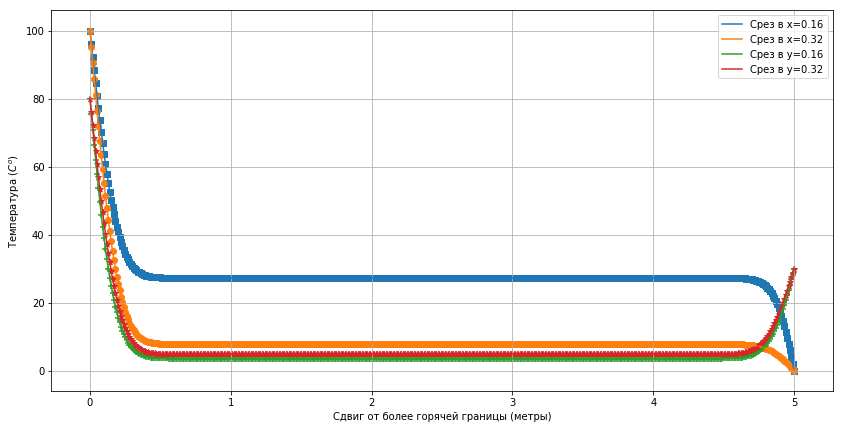

In [15]:
plt.figure(figsize=(14, 7))
grid = np.arange(data.shape[0]) / 100
plot(data, grid)
#plot(data_true, grid)  # проверенный график, вычисленный на одном процессе
plt.ylabel("Температура ($C^o$)")
plt.xlabel("Сдвиг от более горячей границы (метры)")
plt.legend()
plt.grid()
plt.savefig('temperature_plot.png', format='png', dpi=300)
plt.show()

_____________________
Ускорение и эффективность

In [16]:
times_on = []
fname_preffix = "time_on_"
fname_suffix = ".txt"
for i in range(1, 13):
    fname = (
        fname_preffix + str(i // 10 + int("0")) +
        str(i % 10 + int("0")) + fname_suffix
    )
    times = []
    with open(fname, "rt") as f:
        for line in f:
            times.append(float(line))
    times.sort()
    times_on.append(times)

times_on = np.array(times_on)
print(times_on)

[[ 9.54816413  9.60684896  9.60808802]
 [ 6.20527792  6.25548482  6.36924601]
 [ 5.04834199  5.26705289  5.34476996]
 [ 4.50845599  4.55203295  4.60649204]
 [ 4.33853292  4.39778209  4.49179006]
 [ 4.11410093  4.16257095  4.23007512]
 [ 4.08149505  4.12007809  4.1556859 ]
 [ 4.06423497  4.09939504  4.28159404]
 [ 3.92143297  4.13847899  4.13979196]
 [ 3.77147412  3.79842711  3.905442  ]
 [ 3.79334784  3.9027009   3.92957497]
 [ 3.59250784  3.67786884  3.79012513]]


In [17]:
measured_vals = times_on[:, 0:4].mean(axis=1)
print(measured_vals)

[ 9.58770037  6.27666958  5.22005494  4.55566033  4.40936836  4.16891567
  4.11908635  4.14840802  4.06656798  3.82511441  3.8752079   3.68683394]


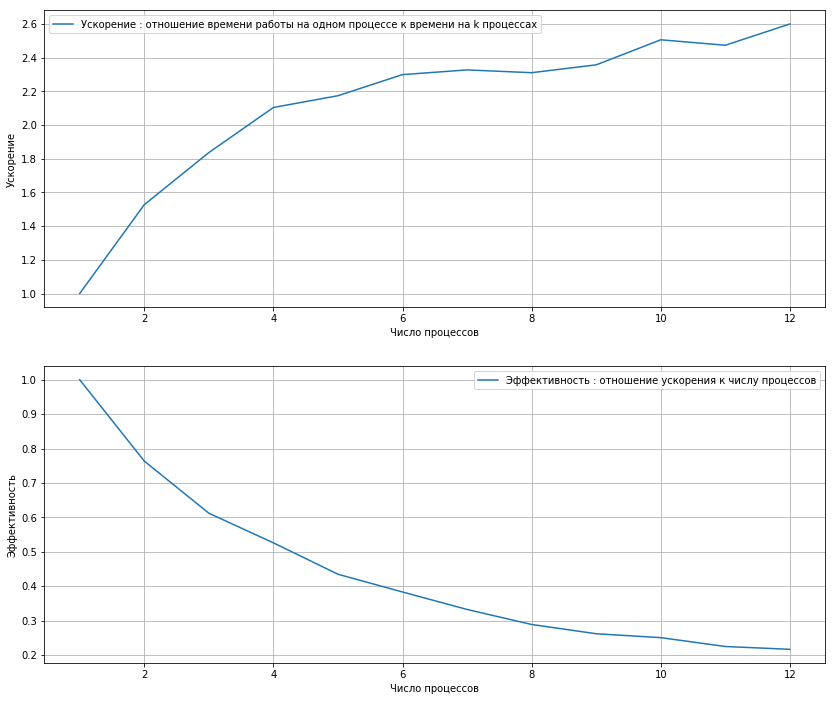

In [18]:
plt.figure(figsize=(14, 12))
plt.subplot(211)
plt.plot(np.arange(1, 13), measured_vals[0] / measured_vals,
         label="Ускорение : отношение времени работы на" + 
         " одном процессе к времени на k процессах")
plt.xlabel("Число процессов")
plt.ylabel("Ускорение")
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(np.arange(1, 13), (measured_vals[0] / measured_vals) / np.arange(1, 13),
         label="Эффективность : отношение ускорения к числу процессов")
plt.xlabel("Число процессов")
plt.ylabel("Эффективность")
plt.legend()
plt.grid()
plt.savefig('acceleration_and_efficiency.png', format='png', dpi=300)
plt.show()